You are given a zip file which contains summaries of news from BBC. The Data is taken from Kaggle. (https://www.kaggle.com/pariza/bbc-news-summary)
The zip file contains a folder: ‘BBC News Articles ‘
This folder contains 5 sub folders, named:
1. Business
2. Entertainment
3. Politics
4. Sports
5. Tech
Each of these subfolders contains text files which have summaries of different news articles.
These are the tasks which you have to perform:
• Read all the files from all subfolders and store their summaries in a single CSV file. Name CSV File as: “BBCNewsArticles.csv”
    Perform clustering on the dataset using all 3 different types of vectorizations. The number of clusters should be 5.
You can choose any appropriate clustering algorithm of your choice.
Make models for each type of vectorization. We will have a total of 3 models.
• Save the Clusters Label for each model in a new CSV file named “BBCNewsArticlesClustered.csv”
• Evaluate and compare the performance of 3 models on basis of Silhouette Coefficient.
• Provide Visualizations for all 3 models. You can show scatter plots and bar graphs.

In [163]:
import os
os.chdir("C:\\Users\\tuhin.samanta\\Desktop\\Personal\\Personal POC\\Edureka ML Engineer Course\\5_NLP\\Certification Project")
os.getcwd()

'C:\\Users\\tuhin.samanta\\Desktop\\Personal\\Personal POC\\Edureka ML Engineer Course\\5_NLP\\Certification Project'

In [164]:
os.chdir('Dataset\\BBC News Articles')

In [165]:
os.getcwd()

'C:\\Users\\tuhin.samanta\\Desktop\\Personal\\Personal POC\\Edureka ML Engineer Course\\5_NLP\\Certification Project\\Dataset\\BBC News Articles'

In [166]:
os.listdir()

['business', 'entertainment', 'politics', 'sport', 'tech']

In [167]:
import pandas as pd
import numpy as np

lstdir = []
lstfile = []
lstfiletxt = []
for bbc_dir in os.listdir():
    #os.chdir(bbc_dir)
    filelst = os.listdir(bbc_dir)
    for file in filelst:
        fp = open(bbc_dir+"\\"+file,'r')
        fileval = fp.read()
        lstdir.append(bbc_dir)
        lstfile.append(file)
        lstfiletxt.append(fileval)
df = pd.DataFrame({"Directory": lstdir, "File": lstfile, "Text": lstfiletxt})      
        

In [168]:
df.sample(10)

,Directory,File,Text
147,tech,010.txt,Google's toolbar sparks concern\n\nSearch engi...
69,entertainment,036.txt,Hanks greeted at wintry premiere\n\nHollywood ...
91,politics,019.txt,Drink remark 'acts as diversion'\n\nThe first ...
56,entertainment,023.txt,Famed music director Viotti dies\n\nConductor ...
131,sport,029.txt,Isinbayeva heads for Birmingham\n\nOlympic pol...
75,politics,003.txt,Hewitt decries 'career sexism'\n\nPlans to ext...
163,tech,026.txt,Warnings about junk mail deluge\n\nThe amount ...
20,business,021.txt,Rank 'set to sell off film unit'\n\nLeisure gr...
17,business,018.txt,India's rupee hits five-year high\n\nIndia's r...
156,tech,019.txt,Intel unveils laser breakthrough\n\nIntel has ...


In [170]:
os.chdir("C:\\Users\\tuhin.samanta\\Desktop\\Personal\\Personal POC\\Edureka ML Engineer Course\\5_NLP\\Certification Project")
df.to_csv("BBCNewsArticles.csv")

In [171]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [172]:
def remove_stopwords_splchars(sentence):
    punctuations = re.compile(r'[-.?!,:;()|0-9]')
    post_punc =[]
    post_stopwords = []
    word_tokens = word_tokenize(sentence)
    for word in word_tokens:
      newword = punctuations.sub("", word)
      if len(newword)> 1:
         post_punc.append(newword)
    stopword_list = stopwords.words('english')
    for words in post_punc:
        if words not in stopword_list:
           post_stopwords.append(words)
    strval = TreebankWordDetokenizer().detokenize(post_stopwords)
    return strval   
strnew = "In 2003, crop production totalled 11.49 million tonnes, the joint report from the Food and Agriculture Organisation and the World Food Programme said. Good rains, increased use of fertilizers and improved seeds contributed to the rise in production. Nevertheless, 2.2 million Ethiopians will still need emergency assistance.The report calculated emergency food requirements for 2005 to be 387,500 tonnes. On top of that, 89,000 tonnes of fortified blended food and vegetable oil for targeted supplementary food distributions for a survival programme for children under five and pregnant and lactating women will be needed.In eastern and southern Ethiopia, a prolonged drought has killed crops and drained wells. Last year, a total of 965,000 tonnes of food assistance was needed to help seven million Ethiopians. The Food and Agriculture Organisation (FAO) recommend that the food assistance is bought locally. Local purchase of cereals for food assistance programmes is recommended as far as possible, so as to assist domestic markets and farmers,"
remove_stopwords_splchars(strnew)

'In crop production totalled million tonnes joint report Food Agriculture Organisation World Food Programme said Good rains increased use fertilizers improved seeds contributed rise production Nevertheless million Ethiopians still need emergency assistanceThe report calculated emergency food requirements tonnes On top tonnes fortified blended food vegetable oil targeted supplementary food distributions survival programme children five pregnant lactating women neededIn eastern southern Ethiopia prolonged drought killed crops drained wells Last year total tonnes food assistance needed help seven million Ethiopians The Food Agriculture Organisation FAO recommend food assistance bought locally Local purchase cereals food assistance programmes recommended far possible assist domestic markets farmers'

In [173]:
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.stem import SnowballStemmer

def word_stemming(sentence):
    after_stemming = []
    sbs = SnowballStemmer('english')
    word_tokens = word_tokenize(sentence)
    for word in word_tokens:
        #print(sbs.stem(word))
        after_stemming.append(sbs.stem(word)) 
    lst_val = list(set(after_stemming))
    strval = TreebankWordDetokenizer().detokenize(lst_val)
    return strval
    

In [174]:
word_stemming("The Food Agriculture Organisation FAO recommend food assistance bought locally Local purchase cereals food assistance programmes recommended far possible assist domestic markets farmers")

'purchas possibl bought organis fao programm domest assist local cereal far food agricultur recommend farmer market the'

In [175]:
df['Text']= df['Text'].map(remove_stopwords_splchars)
df['Text'] = df['Text'].map(word_stemming)

In [176]:
stopword_list = stopwords.words('english')
#stopword_list

In [177]:
df['Text'][1]

'almost trade beij save new fallen recent earlier major remain peg"condit time thursday month friday prop high newspap need ear rate differenti comment alan worri movement mani open competit chines februari highlight late think meantim could factor decis and part gain sanguin hit european foreign call reduc highest longerterm budget white currenc us york next close he sixth hous minist shift point three quarter euro firm greenspan may level london mr asset feder meet big govern howev chairman in stabilis bank unlik curb concern the enough financ set announc view worsethanexpect believ buy boost willing monday spend interest keep export job market sharp attract well current thought sinch deficit speech yawn polici made data half tumbl dollar lay window said household taken strategi back therefor greenback bond china on\'s much meaning trillion account but higher produc halfpoint ahead gap``despit year ripe deaf fall sent robert look reach head price improv take rise help loosen move fun

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
x_values = count_vect.fit_transform(df['Text'])
x_columns = count_vect.get_feature_names()
df_count_vect = pd.DataFrame(x_values.toarray(), columns=x_columns)

In [179]:
df_count_vect.shape

(179, 6016)

In [180]:
df_count_vect.columns

Index(['aaa', 'aadc', 'abacus', 'abandon', 'abat', 'abid', 'abil', 'abiyot',
       'abl', 'abnorm',
       ...
       'zar', 'zara', 'zealand', 'zemecki', 'zen', 'zenith', 'zeroeight',
       'zhang', 'ziyi', 'zoe'],
      dtype='object', length=6016)

In [181]:
df_count_vect.sample(5)

,aaa,aadc,abacus,abandon,abat,abid,abil,abiyot,abl,abnorm,...,zar,zara,zealand,zemecki,zen,zenith,zeroeight,zhang,ziyi,zoe
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
from sklearn.cluster import KMeans

In [183]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_count_vect)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [184]:
kmeans.cluster_centers_

array([[ 6.25000000e-02,  1.73472348e-18,  1.73472348e-18, ...,
         3.46944695e-18,  3.46944695e-18,  6.25000000e-02],
       [ 5.20417043e-18,  4.54545455e-02,  4.54545455e-02, ...,
         5.20417043e-18,  5.20417043e-18,  5.20417043e-18],
       [ 9.43396226e-03, -3.46944695e-18, -3.46944695e-18, ...,
         1.88679245e-02,  1.88679245e-02,  9.43396226e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.93889390e-18,  3.46944695e-18,  3.46944695e-18, ...,
         6.93889390e-18,  6.93889390e-18,  6.93889390e-18]])

In [185]:
label, counts = np.unique(kmeans.labels_, return_counts= True)
print(dict(zip(label, counts)))

{0: 16, 1: 22, 2: 106, 3: 2, 4: 33}


In [186]:
df_count_vect['label'] = kmeans.labels_

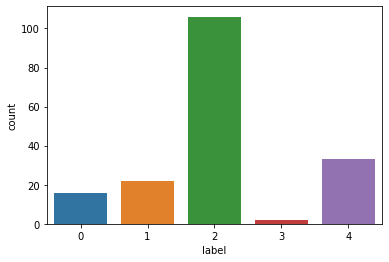

In [187]:
sns.countplot(df_count_vect['label'])

In [188]:
no_of_clusters = [2, 3, 4, 5, 6,7,8] 
X, y = train_test_split(df_count_vect, test_size=0.2, random_state=7)
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(df_count_vect) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(df_count_vect, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.04388141414891639
For no of clusters = 3  The average silhouette_score is : -0.02554962687811622
For no of clusters = 4  The average silhouette_score is : -0.01821763167463092
For no of clusters = 5  The average silhouette_score is : 0.027980513658490375
For no of clusters = 6  The average silhouette_score is : -0.0004259940272487737
For no of clusters = 7  The average silhouette_score is : 0.031515912621908365
For no of clusters = 8  The average silhouette_score is : 0.038645461405984204


In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=1, lowercase=True, stop_words = 'english')
tfidf_values = tfidf_vect.fit_transform(df['Text'])
tfidf_columns = tfidf_vect.get_feature_names()
df_tfidf = pd.DataFrame(tfidf_values.toarray(), columns = tfidf_columns)

In [190]:
df_tfidf.shape

(179, 5845)

In [191]:
kmeans1 = KMeans(n_clusters=5)
kmeans1.fit(df_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [192]:
kmeans1.cluster_centers_

array([[ 7.44116772e-03, -5.42101086e-19, -2.16840434e-19, ...,
         2.75109666e-03,  2.75109666e-03,  2.09689867e-03],
       [-6.50521303e-19,  2.24624153e-03,  1.28664318e-03, ...,
         1.08420217e-18,  1.08420217e-18,  2.44655406e-03],
       [ 0.00000000e+00,  0.00000000e+00,  5.42101086e-20, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.30104261e-18, -6.50521303e-19, -2.71050543e-19, ...,
         1.08420217e-18,  1.08420217e-18,  8.67361738e-19],
       [-1.30104261e-18, -6.50521303e-19, -2.71050543e-19, ...,
         2.45867128e-03,  2.45867128e-03,  8.67361738e-19]])

In [193]:
df_tfidf['label']= kmeans1.labels_

In [194]:
label, counts = np.unique(kmeans.labels_, return_counts = True)
dict(zip(label,counts))

{0: 16, 1: 22, 2: 106, 3: 2, 4: 33}

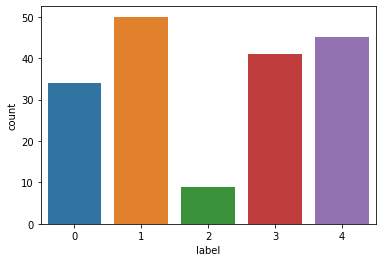

In [195]:
sns.countplot(df_tfidf['label'])

In [196]:
df_tfidf.to_csv('BBCNewsArticlesClustered.csv')

In [197]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [199]:
no_of_clusters = [2, 3, 4, 5, 6,7,8] 
X, y = train_test_split(df_tfidf, test_size=0.2, random_state=7)
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(df_tfidf) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(df_tfidf, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.48067794850181156
For no of clusters = 3  The average silhouette_score is : 0.29884064551377937
For no of clusters = 4  The average silhouette_score is : 0.19576979538067119
For no of clusters = 5  The average silhouette_score is : 0.19955655921359572
For no of clusters = 6  The average silhouette_score is : 0.15560366737725181
For no of clusters = 7  The average silhouette_score is : 0.1016612325998874
For no of clusters = 8  The average silhouette_score is : 0.0659892872400232
